In [1]:
# https://aistudio.baidu.com/projectdetail/1236018

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 加载数据集
isDoh = pd.read_csv('dataset/CSVs/Total_CSVs/l1-doh.csv')
nonDoh = pd.read_csv('dataset/CSVs/Total_CSVs/l1-nondoh.csv')
benign = pd.read_csv('dataset/CSVs/Total_CSVs/l2-benign.csv')
malicious = pd.read_csv('dataset/CSVs/Total_CSVs/l2-malicious.csv')

In [4]:
files = {
    'isDoh': isDoh.columns.tolist(),
    'nonDoh': nonDoh.columns.tolist(),
    'benign': benign.columns.tolist(),
    'malicious': malicious.columns.tolist()
}

# 比较列名列表以找出差异
for file1 in files:
    for file2 in files:
        if file1 != file2:
            diff = [col for col in files[file1] if col not in files[file2]]
            print(f"Columns in {file1} but not in {file2}: ", diff)

Columns in isDoh but not in nonDoh:  []
Columns in isDoh but not in benign:  []
Columns in isDoh but not in malicious:  []
Columns in nonDoh but not in isDoh:  []
Columns in nonDoh but not in benign:  []
Columns in nonDoh but not in malicious:  []
Columns in benign but not in isDoh:  []
Columns in benign but not in nonDoh:  []
Columns in benign but not in malicious:  []
Columns in malicious but not in isDoh:  []
Columns in malicious but not in nonDoh:  []
Columns in malicious but not in benign:  []


In [5]:
nonDoh.Label

0         NonDoH
1         NonDoH
2         NonDoH
3         NonDoH
4         NonDoH
           ...  
897488    NonDoH
897489    NonDoH
897490    NonDoH
897491    NonDoH
897492    NonDoH
Name: Label, Length: 897493, dtype: object

In [6]:
# # 查看数据集的形状
# for file in files:
#     print(f"{file} has {files[file].shape[0]} rows and {files[file].shape[1]} columns.")
# 
# # 查看数据集的前几行
# for file in files:
#     print(f"First 5 rows of {file}:")
#     print(files[file].head())
# 
# # 使用描述性统计方法
# for file in files:
#     print(f"Descriptive statistics of {file}:")
#     print(files[file].describe())
# 
# # 检查缺失值
# for file in files:
#     print(f"Missing values in {file}:")
#     print(files[file].isnull().sum())
# 
# # 检查数据类型
# for file in files:
#     print(f"Data types in {file}:")
#     print(files[file].dtypes)

In [7]:
# 为了方便处理，我们将所有数据集合并到一个数据集中
data = pd.concat([ nonDoh, benign, malicious], ignore_index=True)
data

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,NonDoH
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,NonDoH
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,NonDoH
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,NonDoH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167131,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:46:31,120.653838,78776,6.529092e+02,46073,381.861040,...,0.614497,8.716113e-09,0.000093,0.000054,0.000037,0.000028,0.538614,0.275939,1.736555,Malicious
1167132,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:48:32,120.718680,78719,6.520863e+02,46047,381.440553,...,0.615953,8.737216e-07,0.000935,0.000110,0.000032,0.000024,0.250408,0.092028,8.495895,Malicious
1167133,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:50:33,120.645723,78808,6.532183e+02,46118,382.259718,...,0.646320,1.558392e-06,0.001248,0.000128,0.000035,0.000025,0.222679,0.082237,9.778681,Malicious
1167134,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:52:33,120.652326,77281,6.405264e+02,46015,381.385105,...,0.593311,1.055948e-09,0.000032,0.000044,0.000034,0.000017,0.935545,0.819613,0.744732,Malicious


In [8]:
data.columns
data.isnull().sum()

SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTimeMean                               0
PacketTimeMed

In [9]:
data.columns.shape

(35,)

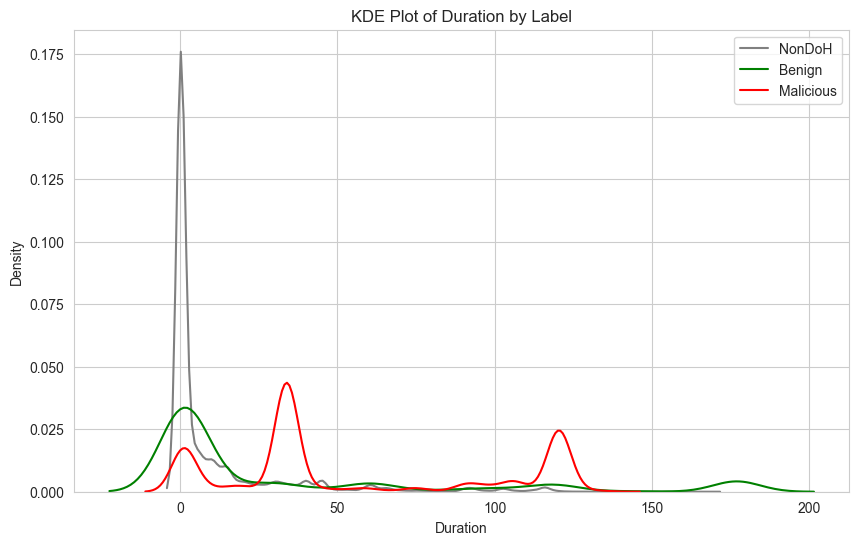

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 为每个'label'值创建一个子数据集，然后将这些子数据集的'Duration'列作为`kdeplot()`函数的输入
labels = ['NonDoH', 'Benign', 'Malicious']
colors = ['gray', 'green', 'red']
for i, label in enumerate(labels):
    sns.kdeplot(data[data['Label'] == label]['Duration'], color=colors[i], label=label)

# 设置图形的标题和标签
plt.title('KDE Plot of Duration by Label')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.legend()

# 显示图形
plt.show()

In [11]:
data.Label.value_counts()

Label
NonDoH       897493
Malicious    249836
Benign        19807
Name: count, dtype: int64

In [12]:
## 数据处理
from sklearn.preprocessing import StandardScaler

# 删除包含缺失值的行
data = data.dropna()

In [13]:
data

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,NonDoH
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,NonDoH
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,NonDoH
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,NonDoH
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,NonDoH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167131,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:46:31,120.653838,78776,6.529092e+02,46073,381.861040,...,0.614497,8.716113e-09,0.000093,0.000054,0.000037,0.000028,0.538614,0.275939,1.736555,Malicious
1167132,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:48:32,120.718680,78719,6.520863e+02,46047,381.440553,...,0.615953,8.737216e-07,0.000935,0.000110,0.000032,0.000024,0.250408,0.092028,8.495895,Malicious
1167133,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:50:33,120.645723,78808,6.532183e+02,46118,382.259718,...,0.646320,1.558392e-06,0.001248,0.000128,0.000035,0.000025,0.222679,0.082237,9.778681,Malicious
1167134,1.1.1.1,192.168.20.207,443,33926,2020-04-01 00:52:33,120.652326,77281,6.405264e+02,46015,381.385105,...,0.593311,1.055948e-09,0.000032,0.000044,0.000034,0.000017,0.935545,0.819613,0.744732,Malicious


In [14]:
# 定义无关特征列表
irrelevant_features = ['SourceIP', 'DestinationIP', 'SourcePort','DestinationPort','TimeStamp']

# 删除无关特征，确认需要的特征
features = data.drop(columns=irrelevant_features + ['Label'])
features

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
0,4.544040,11256331,2.477164e+06,159324,35062.191354,427496.394703,653.832084,1106.811615,1514.0,1514,...,1.617572,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823
1,8.171041,930,1.138166e+02,11936,1460.768585,434289.817175,659.006690,677.157895,328.0,1514,...,0.495092,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273
2,0.033776,162,4.796305e+03,138,4085.741355,86.400000,9.295160,60.000000,54.0,54,...,1.999993,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000
3,0.060723,108,1.778568e+03,120,1976.186947,9.000000,3.000000,57.000000,57.0,54,...,1.732051,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000
4,0.019545,55,2.814019e+03,66,3376.822717,30.250000,5.500000,60.500000,60.5,55,...,1.000000,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167131,120.653838,78776,6.529092e+02,46073,381.861040,7979.982650,89.330749,121.566699,87.0,87,...,1.627348,0.614497,8.716113e-09,0.000093,0.000054,0.000037,0.000028,0.538614,0.275939,1.736555
1167132,120.718680,78719,6.520863e+02,46047,381.440553,8141.129962,90.228210,121.604288,87.0,87,...,1.623502,0.615953,8.737216e-07,0.000935,0.000110,0.000032,0.000024,0.250408,0.092028,8.495895
1167133,120.645723,78808,6.532183e+02,46118,382.259718,8648.833760,92.999106,122.476471,87.0,87,...,1.547221,0.646320,1.558392e-06,0.001248,0.000128,0.000035,0.000025,0.222679,0.082237,9.778681
1167134,120.652326,77281,6.405264e+02,46015,381.385105,11417.273333,106.851642,125.300813,87.0,87,...,1.685458,0.593311,1.055948e-09,0.000032,0.000044,0.000034,0.000017,0.935545,0.819613,0.744732


In [15]:
# # 进行均值归一化
# scaler = StandardScaler()
# features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
# 
# # 将归一化后的特征和原始的标签列合并
# data_normalized = pd.concat([features_normalized, data['Label']], axis=1)
# 
# data_normalized

In [26]:
#比较label比例
def label_compare(data):
    # 计算每个标签的数量
    label_counts = data['Label'].value_counts()
    
    # 计算每个标签的比例并取整
    label_proportions = (label_counts / len(data) * 100).round().astype(int)
    # 打印结果
    print(label_proportions)

In [17]:
# 重置features和data['Label']的行索引
features = features.reset_index(drop=True)
labels = data['Label'].reset_index(drop=True)

# 进行归一化处理
scaler = StandardScaler()
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 合并归一化后的特征和标签
data_normalized = pd.concat([features_normalized, labels], axis=1)
data_normalized

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,-0.459933,111.715645,10.074890,0.303309,0.071276,0.073578,0.612878,2.723806,5.033437,4.154503,...,-0.749516,-0.12314,-0.202725,-0.172092,-0.129674,-0.092241,0.623021,0.364966,7.489026,NonDoH
1,-0.354676,-0.163515,-0.037371,-0.109418,-0.133041,0.079790,0.624284,1.302270,0.677398,4.154503,...,1.235480,0.14023,1.289286,0.422776,-0.066270,-0.091504,0.895693,0.458730,0.777641,NonDoH
2,-0.590821,-0.171149,-0.018255,-0.142455,-0.117079,-0.317282,-0.807802,-0.739636,-0.328972,-0.267478,...,-0.887535,-0.12314,-0.203002,-0.149509,-0.109086,-0.064221,-1.649679,-1.703498,-0.525617,NonDoH
3,-0.590039,-0.171686,-0.030575,-0.142506,-0.129907,-0.317353,-0.821677,-0.749562,-0.317953,-0.267478,...,-0.755652,-0.12314,-0.203002,-0.131389,-0.092572,-0.041747,-1.649679,-1.703498,-0.525617,NonDoH
4,-0.591234,-0.172213,-0.026347,-0.142657,-0.121390,-0.317333,-0.816167,-0.737982,-0.305098,-0.264449,...,-0.035015,-0.12314,-0.203002,-0.158995,-0.117731,-0.075987,-1.649679,-1.703498,-0.525617,NonDoH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159103,2.909599,0.610277,-0.035170,-0.013825,-0.139601,-0.310063,-0.631388,-0.535939,-0.207767,-0.167529,...,-0.692316,-0.12314,-0.202924,-0.172073,-0.129661,-0.092230,0.722503,0.413949,0.591851,Malicious
1159104,2.911481,0.609711,-0.035173,-0.013898,-0.139604,-0.309916,-0.629410,-0.535815,-0.207767,-0.167529,...,-0.689833,-0.12314,-0.202225,-0.172036,-0.129664,-0.092233,0.657629,0.376052,4.941467,Malicious
1159105,2.909364,0.610595,-0.035169,-0.013699,-0.139599,-0.309452,-0.623303,-0.532929,-0.207767,-0.167529,...,-0.638055,-0.12314,-0.201964,-0.172024,-0.129662,-0.092232,0.651388,0.374035,5.766936,Malicious
1159106,2.909555,0.595417,-0.035220,-0.013987,-0.139604,-0.306920,-0.592769,-0.523585,-0.207767,-0.167529,...,-0.728439,-0.12314,-0.202975,-0.172080,-0.129663,-0.092239,0.811850,0.525978,-0.046384,Malicious


In [33]:
# 划分训练集 和 测试集
from sklearn.model_selection import train_test_split

# 将smoted_data数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)
# 打印训练集和测试集的大小
print(f"Size of training set: {len(X_train)}")
print(f"Size of test set: {len(X_test)}")

Size of training set: 1043197
Size of test set: 115911


In [55]:
y_train

339604       NonDoH
481309       NonDoH
936456    Malicious
266792       NonDoH
357690       NonDoH
            ...    
110268       NonDoH
259178       NonDoH
131932       NonDoH
671155       NonDoH
121958       NonDoH
Name: Label, Length: 1043197, dtype: object

In [54]:
# 数据平衡

from imblearn.over_sampling import SMOTE

# 计算Benign类别的样本数量
n_Benign = y_train.value_counts()['Benign']

# 定义过采样策略
sampling_strategy = {'Benign': n_Benign * 4}  # 我们希望Benign类别的样本数量为原来的三倍

# 创建SMOTE过采样的对象
smote = SMOTE(sampling_strategy=sampling_strategy)

# 对特征和标签进行SMOTE过采样
features_smote, labels_smote = smote.fit_resample(X_train, y_train)

smoted_data = pd.concat([features_smote, labels_smote], axis=1)
smoted_data

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,5.100275,2730,535.265255,9030,1770.492768,288968.800000,537.558183,470.400000,66.000000,54,...,1.265408,0.013253,0.115123,0.205609,0.155014,0.150279,1.318455,0.480619,0.559910,NonDoH
1,0.233370,154,659.896302,100,428.504092,470.222222,21.684608,84.666667,100.000000,100,...,0.707107,0.000000,0.000000,0.233361,0.233361,0.233361,-10.000000,-10.000000,0.000000,NonDoH
2,33.635315,1807,53.723296,4760,141.517925,149761.177296,386.989893,234.535714,84.000000,68,...,1.684639,22.045759,4.695291,1.669836,0.015552,0.000020,1.056985,0.355636,2.811827,Malicious
3,33.218383,1252,37.689974,2869,86.367840,7354.876735,85.760578,117.742857,93.000000,93,...,0.338050,0.000175,0.013217,0.017598,0.025148,0.000034,-1.713813,1.328866,0.751067,NonDoH
4,0.015137,55,3633.480875,66,4360.177050,30.250000,5.500000,60.500000,60.500000,55,...,1.000000,0.000000,0.000000,0.015137,0.015137,0.015137,-10.000000,-10.000000,0.000000,NonDoH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096562,0.104773,2535,24195.258805,3440,32838.550676,31208.906616,176.660426,186.737069,101.000000,66,...,0.344063,0.000089,0.009458,0.010182,0.007603,0.000054,0.817768,1.070861,0.928921,Benign
1096563,0.284596,247,868.492512,161,567.243686,294.037762,17.117832,81.765351,95.456689,95,...,0.511617,0.000000,0.000000,0.017256,0.017256,0.017256,-10.000000,-10.000000,0.000000,Benign
1096564,25.836591,1095,42.658413,4000,155.861065,222360.863681,471.551549,299.751166,62.000000,54,...,1.508913,0.000040,0.006331,0.012729,0.015742,0.000072,-1.427395,1.999274,0.497352,Benign
1096565,18.547442,5390,290.830552,7732,417.074703,14068.844857,118.611197,141.533682,105.000000,66,...,1.903253,0.000063,0.007926,0.011433,0.012340,0.000011,-0.359217,1.445356,0.695322,Benign


In [53]:
label_proportions = (y_train.value_counts() / len(data) * 100).round().astype(int)
# 打印结果
print(len(y_train))
print(label_proportions)
print(len(smoted_data))
label_compare(smoted_data)

1043197
Label
NonDoH       69
Malicious    19
Benign        2
Name: count, dtype: int32
1096567
Label
NonDoH       73
Malicious    20
Benign        6
Name: count, dtype: int32


In [56]:
#拆分nonDoh数据集

# 将数据集按照Label列进行分组
groups = smoted_data.groupby('Label')

# 获取每个类别的数据
NonDoH_data = groups.get_group('NonDoH')
Malicious_data = groups.get_group('Malicious')
Benign_data = groups.get_group('Benign')

# 计算每份训练集中NonDoH的样本数量
n_samples = len(NonDoH_data) // 3

# 创建三个训练集
train_sets = []
for i in range(3):
    # 对NonDoH_data进行随机抽样
    NonDoH_samples = NonDoH_data.sample(n_samples, replace=False)
    # 从NonDoH_data中删除已经抽样的样本
    NonDoH_data = NonDoH_data.drop(NonDoH_samples.index)
    # 将NonDoH_samples、Malicious_data和Benign_data合并为一个训练集
    train_set = pd.concat([NonDoH_samples, Malicious_data, Benign_data])
    # 将训练集添加到train_sets列表中
    train_sets.append(train_set)

# 打印每个训练集的大小
for i, train_set in enumerate(train_sets):
    print(f"Size of training set {i+1}: {len(train_set)}")

Size of training set 1: 562803
Size of training set 2: 562803
Size of training set 3: 562803


In [60]:
train_sets[0]

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
245867,0.165551,2143,12944.651497,5945,35910.384111,1.684488e+05,410.425103,299.555556,93.000000,54,...,0.426051,0.000158,0.012573,0.015968,0.025286,0.000046,-2.223280,1.266394,0.787369,NonDoH
773618,43.873932,2365,53.904446,35935,819.051276,5.194551e+06,2279.155784,1035.135135,66.000000,66,...,1.503458,0.000056,0.007501,0.008781,0.014988,0.000007,-2.482521,1.169738,0.854211,NonDoH
392348,5.884103,5399,917.557018,102480,17416.418441,4.661854e+05,682.777698,674.243750,112.000000,1514,...,0.613672,0.123723,0.351743,0.115399,0.000774,0.000016,0.977630,0.328032,3.048063,NonDoH
30335,1.826080,2786,1525.672479,1693,927.122580,7.495848e+04,273.785472,263.470588,78.000000,54,...,0.833983,0.001660,0.040741,0.098977,0.123503,0.018790,-1.805959,1.968217,0.411621,NonDoH
335918,23.428805,12306,525.250861,36200,1545.106547,3.949457e+05,628.447061,551.204545,199.000000,1454,...,0.336109,0.000314,0.017728,0.025791,0.033429,0.000033,-1.292474,1.452932,0.687383,NonDoH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096562,0.104773,2535,24195.258805,3440,32838.550676,3.120891e+04,176.660426,186.737069,101.000000,66,...,0.344063,0.000089,0.009458,0.010182,0.007603,0.000054,0.817768,1.070861,0.928921,Benign
1096563,0.284596,247,868.492512,161,567.243686,2.940378e+02,17.117832,81.765351,95.456689,95,...,0.511617,0.000000,0.000000,0.017256,0.017256,0.017256,-10.000000,-10.000000,0.000000,Benign
1096564,25.836591,1095,42.658413,4000,155.861065,2.223609e+05,471.551549,299.751166,62.000000,54,...,1.508913,0.000040,0.006331,0.012729,0.015742,0.000072,-1.427395,1.999274,0.497352,Benign
1096565,18.547442,5390,290.830552,7732,417.074703,1.406884e+04,118.611197,141.533682,105.000000,66,...,1.903253,0.000063,0.007926,0.011433,0.012340,0.000011,-0.359217,1.445356,0.695322,Benign
